# 3 CER Forest Structure Analysis Post Defense  - adding in some snowpack

### Notebook contents 
* Copied from notebook 7 to start after the defense.
* Start addressing forest structure with BAF and DCE...
* Using the netcdf v3 from notebook 1 in this folder

created by Cassie Lumbrazo\
date: Feb 2024\
python environment: **raster**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                         (band: 1, y: 1388, x: 2564)
Coordinates:
  * x                               (x) float64 4.65e+05 4.65e+05 ... 4.676e+05
  * y                               (y) float64 2.111e+05 ... 2.097e+05
  * band                            (band) int32 1
    spatial_ref                     int32 ...
Data variables: (12/213)
    hs_rapid_set1                   (band, y, x) float32 ...
    hs_rapid_set2                   (band, y, x) float32 ...
    hs_rapid_set3                   (band, y, x) float32 ...
    hs_rapid_set2_maskpiles         (band, y, x) float32 ...
    hs_rapid_set3_maskpiles         (band, y, x) float32 ...
    chmws_rapid                     (band, y, x) float32 ...
    ...                              ...
    chmws_rapid_baf_new_100s        (band, y, x) float32 ...
    chmws_ncalm_baf_new_30s         (band, y, x) float32 ...
    chmws_ncalm_baf_new_60s         (band, y, x) float32 ...
    chmws_ncalm_baf_new_80s         (band, y, x) float32 ...
    chmws_ncalm_baf_new_90s         (band, y, x) float32 ...
    chmws_ncalm_baf_new_100s        (band, y, x) float32 ...

In [4]:
# for the entire dataset, make all else nan where ds.dce_rapid is nan 
# ds = ds.where(ds.dce_rapid != -9999)
ds = ds.where(ds.dce_rapid.notnull()) # making the entire dataset null where there is no data here 

In [6]:
ds['giulia_dce_snowoff']

KeyError: 'giulia_dce_snowoff'

## Snow Depth Box Plots, DCE Groups

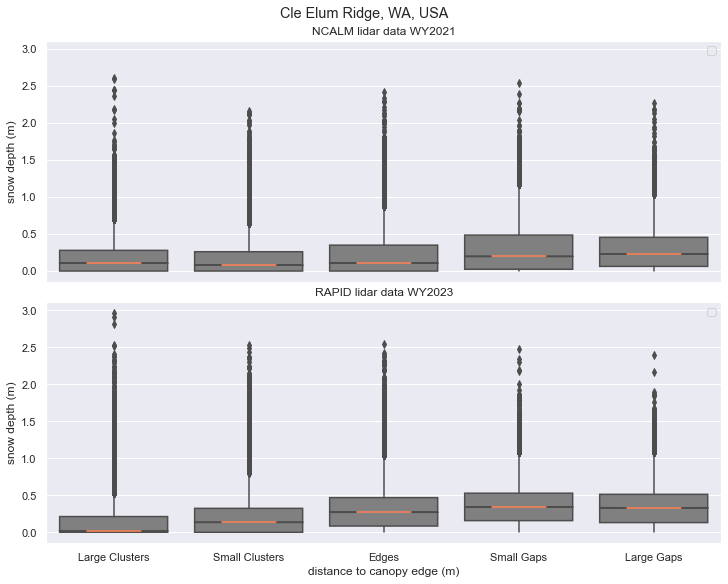

In [40]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            notch=True, showcaps=False, medianprops={"color":"coral"}, color='grey')

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
           notch=True, showcaps=False, medianprops={"color":"coral"}, color='grey')

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

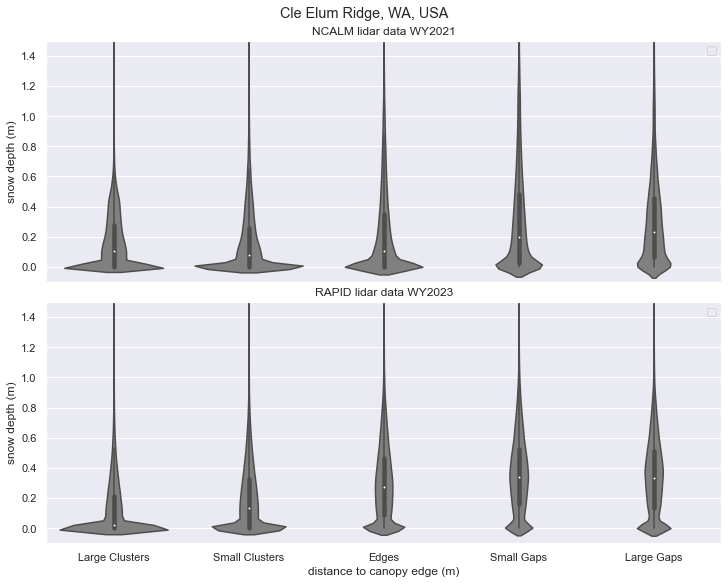

In [45]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.violinplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            notch=True, showcaps=True, medianprops={"color":"coral"}, color='grey')

sns.violinplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
           notch=True, showcaps=True, medianprops={"color":"coral"}, color='grey')

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.ylim(-0.1, 1.5)

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            notch=True, showcaps=True, medianprops={"color":"coral"}, color='grey')

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
           notch=True, showcaps=True, medianprops={"color":"coral"}, color='grey')

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.ylim(-0.1, 1.5)

plt.show()

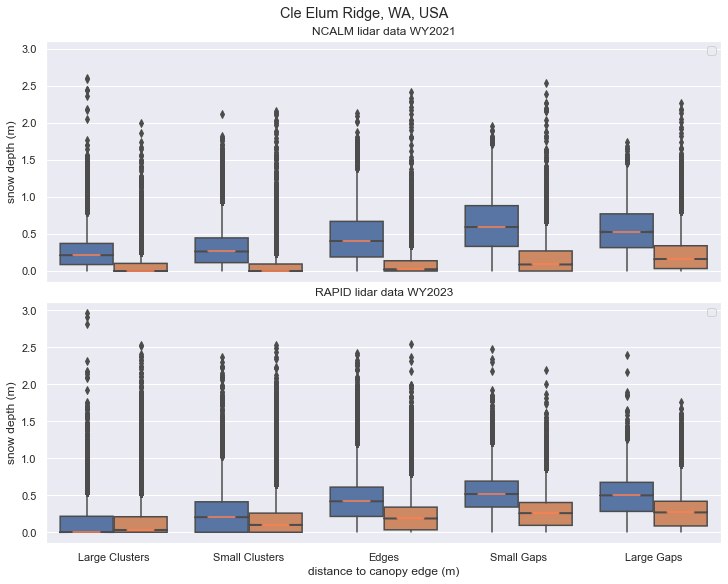

In [6]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=False, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

plt.show()

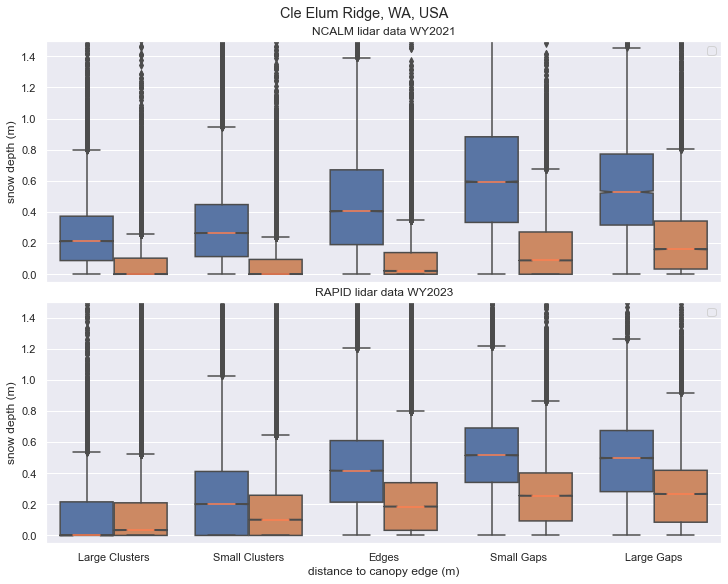

In [47]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.boxplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

sns.boxplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
axes[0].set_ylim(-0.05, 1.5)
axes[1].set_ylim(-0.05, 1.5)

plt.show()

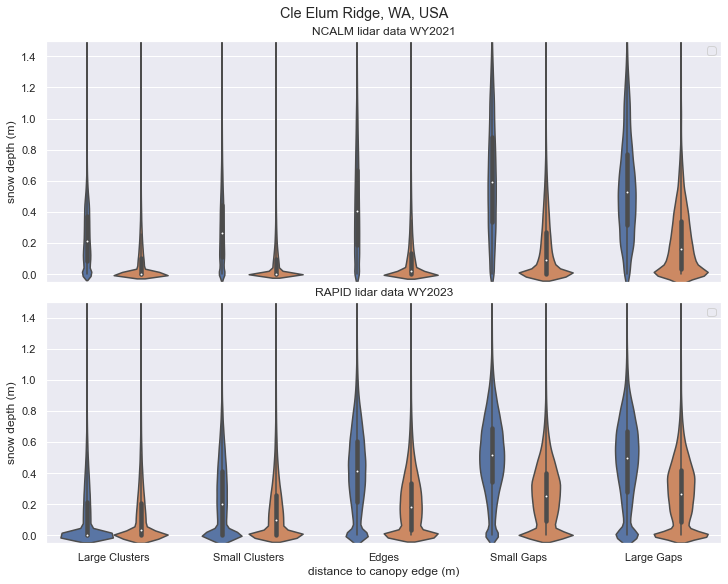

In [48]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.violinplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

sns.violinplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"})

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
axes[0].set_ylim(-0.05, 1.5)
axes[1].set_ylim(-0.05, 1.5)

plt.show()

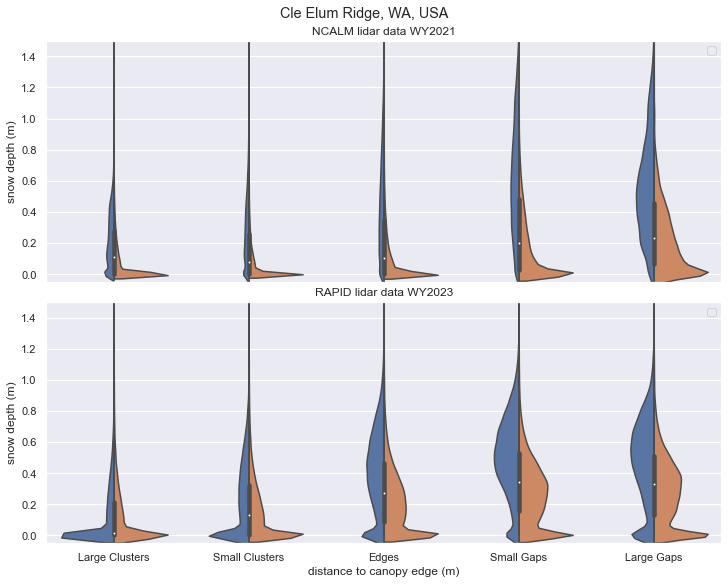

In [51]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

sns.violinplot(ax=axes[0], x=ds['dce_ncalm_reclass'].values.flatten(), y=ds['hs_ncalm'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"}, split=True)

sns.violinplot(ax=axes[1], x=ds['dce_rapid_reclass'].values.flatten(), y=ds['hs_rapid'].values.flatten(), 
            hue=ds['dah_binary'].values.flatten(), notch=True, showcaps=True, medianprops={"color":"coral"}, split=True)

axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('snow depth (m)');axes[1].set_ylabel('snow depth (m)')
axes[0].set_title('NCALM lidar data WY2021')
axes[1].set_title('RAPID lidar data WY2023')
axes[0].set_xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])
axes[0].legend('')
axes[1].legend('')
# 100: large clusters, 200: small clusters, 300: edges, 400: small gaps, 500: large gaps 

# y limit 
axes[0].set_ylim(-0.05, 1.5)
axes[1].set_ylim(-0.05, 1.5)

plt.show()

## Histograms

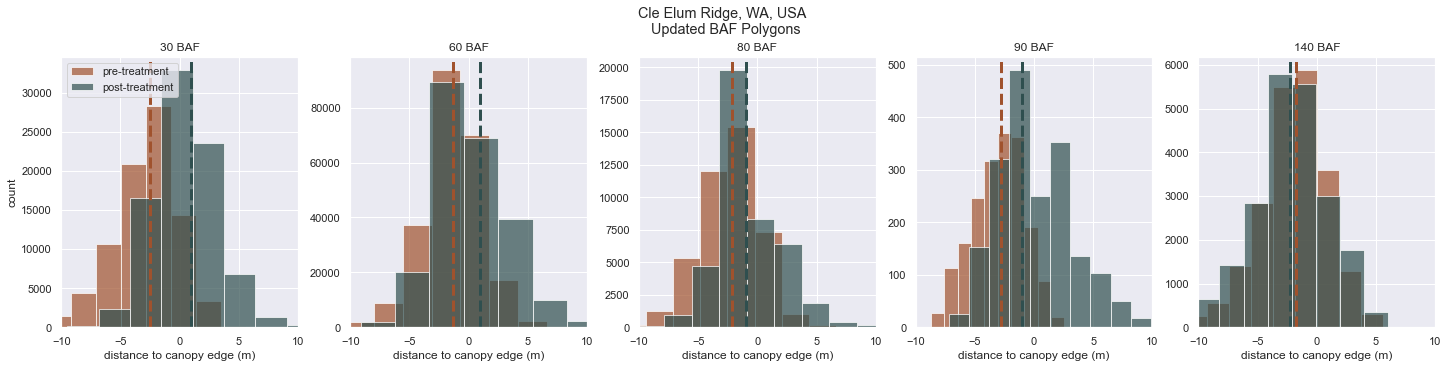

In [8]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_ncalm_baf_new_30s'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30s'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60s'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60s'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80s'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80s'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90s'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90s'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_100s'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_100s'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['dce_ncalm_baf_new_30s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_new_30s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm_baf_new_60s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_new_60s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_ncalm_baf_new_80s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_new_80s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['dce_ncalm_baf_new_90s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['dce_rapid_baf_new_90s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['dce_ncalm_baf_new_100s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['dce_rapid_baf_new_100s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

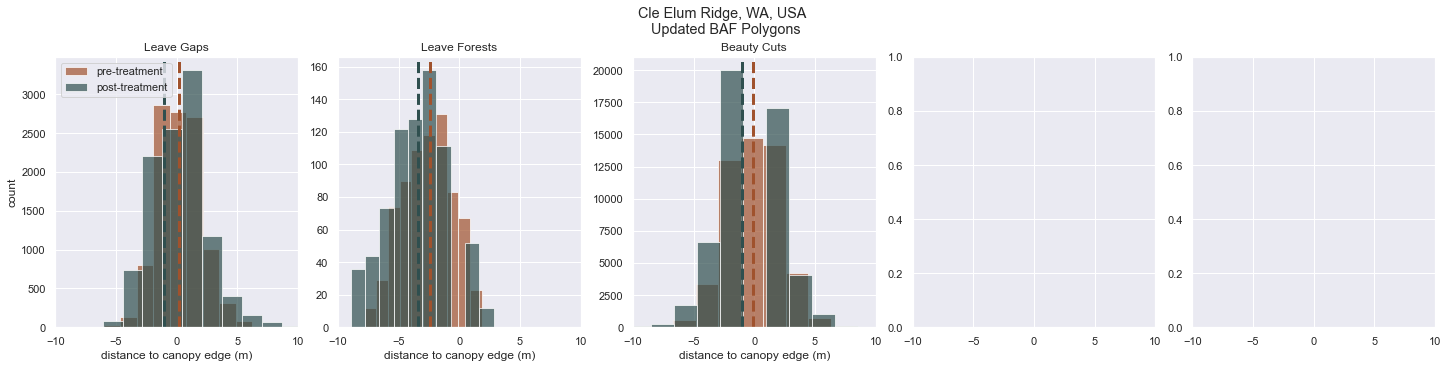

In [20]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['dce_ncalm_baf_new_1'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_1'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_2'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_2'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_3'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_3'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)


# plot the median line for each histogram 
axes[0].axvline(ds['dce_ncalm_baf_new_1'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['dce_rapid_baf_new_1'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm_baf_new_2'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid_baf_new_2'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['dce_ncalm_baf_new_3'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['dce_rapid_baf_new_3'].median(), color=colorpos, linestyle='dashed', linewidth=3)


# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')

axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')


# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

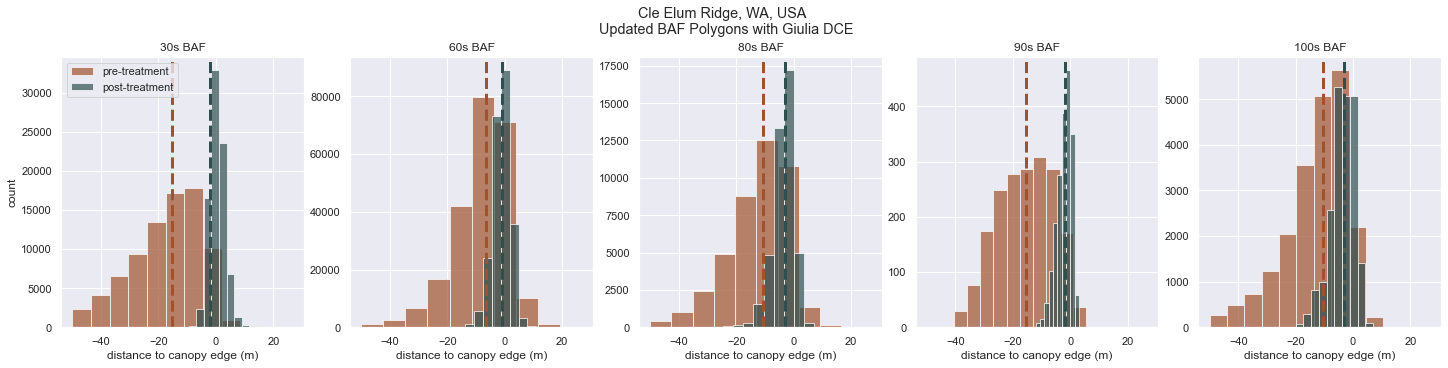

In [10]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
ds['giulia_dce_ncalm_baf_new_30s'].plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30s'].plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

ds['giulia_dce_ncalm_baf_new_60s'].plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_60s'].plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_80s'].plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_80s'].plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_90s'].plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_90s'].plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

ds['giulia_dce_ncalm_baf_new_100s'].plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['giulia_dce_rapid_baf_new_100s'].plot.hist(ax=axes[4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0].axvline(ds['giulia_dce_ncalm_baf_new_30s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['giulia_dce_rapid_baf_new_30s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['giulia_dce_ncalm_baf_new_60s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['giulia_dce_rapid_baf_new_60s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[2].axvline(ds['giulia_dce_ncalm_baf_new_80s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[2].axvline(ds['giulia_dce_rapid_baf_new_80s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[3].axvline(ds['giulia_dce_ncalm_baf_new_90s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[3].axvline(ds['giulia_dce_rapid_baf_new_90s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[4].axvline(ds['giulia_dce_ncalm_baf_new_100s'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[4].axvline(ds['giulia_dce_rapid_baf_new_100s'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0].set_title('30s BAF')
axes[1].set_title('60s BAF')
axes[2].set_title('80s BAF')
axes[3].set_title('90s BAF')
axes[4].set_title('100s BAF')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons with Giulia DCE')
axes[0].legend(loc='upper left')

plt.show()

Versions of the histograms that are binned by the DCE groups 

## Box Plots

Text(0.5, 0, 'distance to canopy edge (m)')

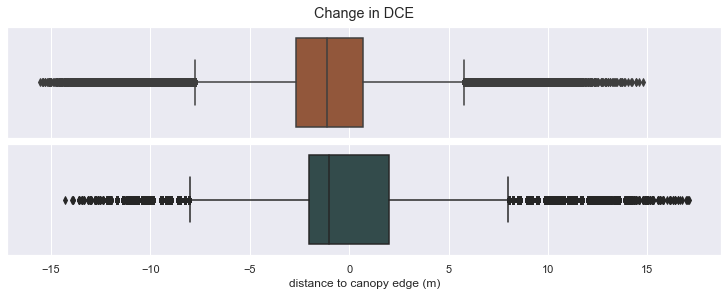

In [11]:
# adjust plot size 
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10,4), constrained_layout = True)
sns.boxplot(ax=axes[0], x = ds['dce_ncalm'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1], x = ds['dce_rapid'].values.flatten(), color=colorpos)

plt.suptitle('Change in DCE')
# plt.ylabel('count')
plt.xlabel('distance to canopy edge (m)')

Text(0.5, 0, 'distance to canopy edge (m)')

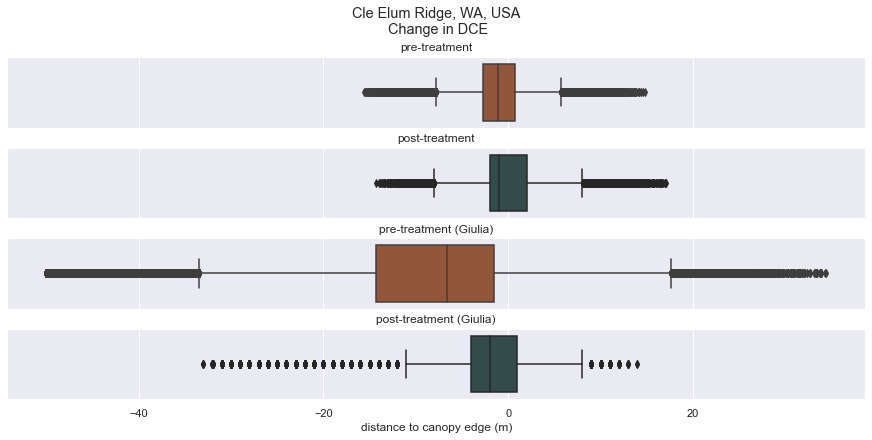

In [12]:
# adjust plot size 
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(12,6), constrained_layout = True)
sns.boxplot(ax=axes[0], x = ds['dce_ncalm'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1], x = ds['dce_rapid'].values.flatten(), color=colorpos)

sns.boxplot(ax=axes[2], x = ds['giulia_dce_ncalm'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid'].values.flatten(), color=colorpos)

axes[0].set_title('pre-treatment')
axes[1].set_title('post-treatment')
axes[2].set_title('pre-treatment (Giulia)')
axes[3].set_title('post-treatment (Giulia)')

plt.suptitle('Cle Elum Ridge, WA, USA\n Change in DCE')
plt.xlabel('distance to canopy edge (m)')

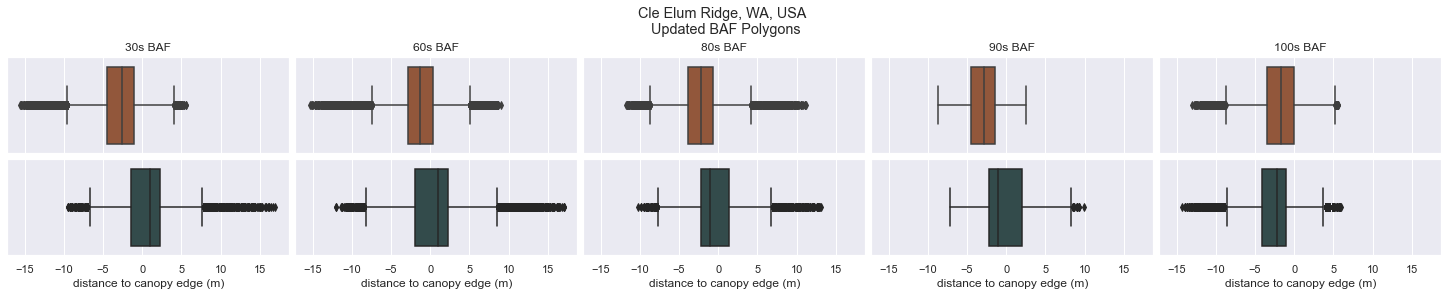

In [13]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20,4), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

sns.boxplot(ax=axes[0,0], x = ds['dce_ncalm_baf_new_30s'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1,0], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos)

sns.boxplot(ax=axes[0,1], x = ds['dce_ncalm_baf_new_60s'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1,1], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos)

sns.boxplot(ax=axes[0,2], x = ds['dce_ncalm_baf_new_80s'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1,2], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos)

sns.boxplot(ax=axes[0,3], x = ds['dce_ncalm_baf_new_90s'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1,3], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos)

sns.boxplot(ax=axes[0,4], x = ds['dce_ncalm_baf_new_100s'].values.flatten(), color=colorpre)
sns.boxplot(ax=axes[1,4], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos)

# labels
axes[0,0].set_title('30s BAF')
axes[0,1].set_title('60s BAF')
axes[0,2].set_title('80s BAF')
axes[0,3].set_title('90s BAF')
axes[0,4].set_title('100s BAF')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')

# adjust x limits
# axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
# axes[0,0].legend(loc='upper left')

plt.show()

Now, plot all the "post-treatment" BAF plots together to see how they compare 

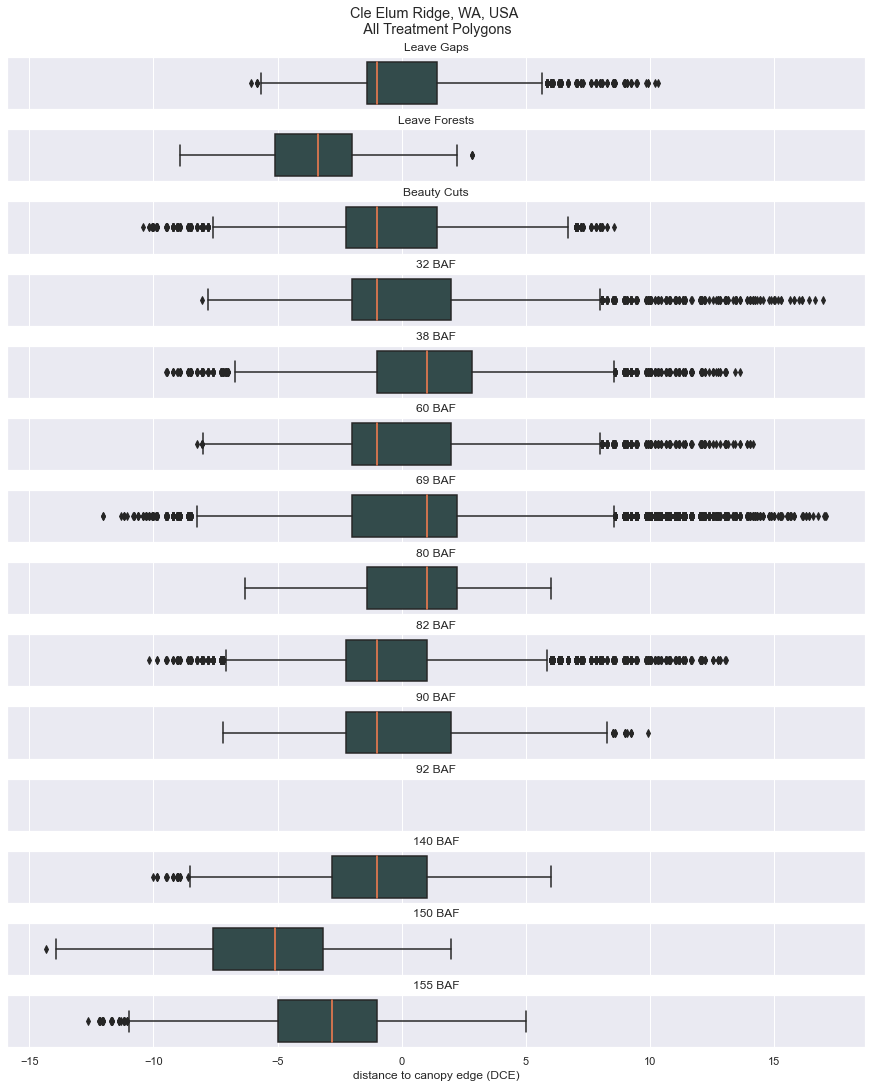

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_32'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['dce_rapid_baf_new_38'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_60'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['dce_rapid_baf_new_69'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_80'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[8], x = ds['dce_rapid_baf_new_82'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[9], x = ds['dce_rapid_baf_new_90'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[10], x = ds['dce_rapid_baf_new_92'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[11], x = ds['dce_rapid_baf_new_140'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[12], x = ds['dce_rapid_baf_new_150'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['dce_rapid_baf_new_155'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
axes[10].set_title('92 BAF')
axes[11].set_title('140 BAF')
axes[12].set_title('150 BAF')
axes[13].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[13].set_xlabel('distance to canopy edge (DCE)')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

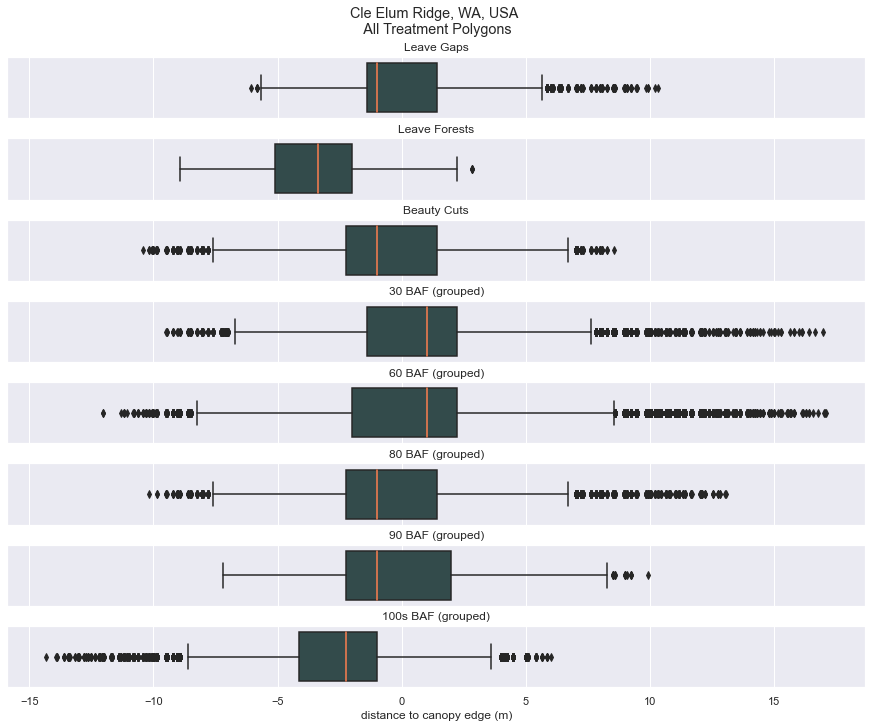

In [22]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[7].set_xlabel('distance to canopy edge (m)')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

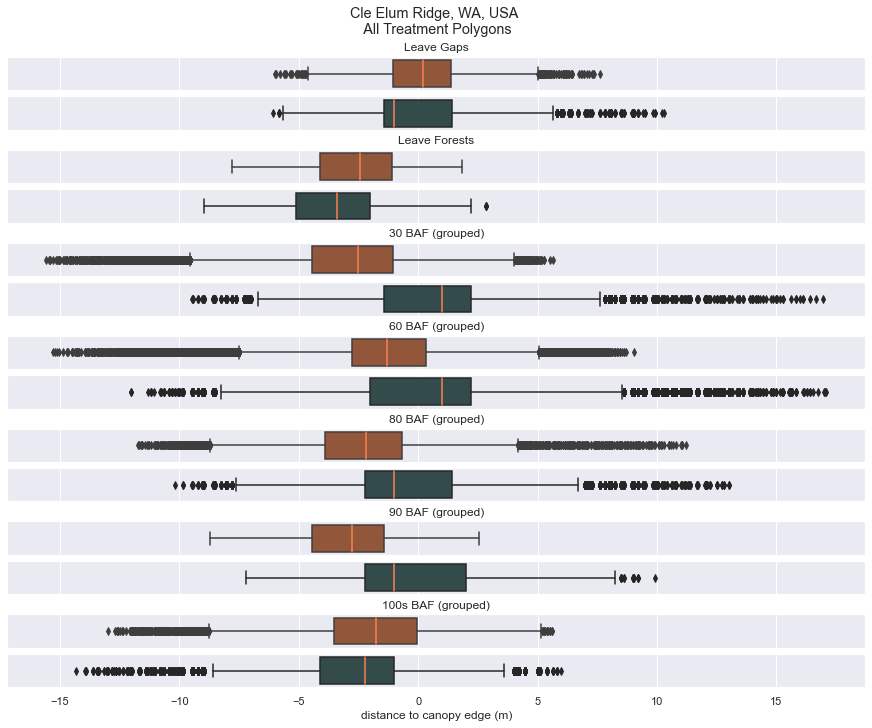

In [28]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['dce_ncalm_baf_new_1'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[2], x = ds['dce_ncalm_baf_new_2'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
# sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[4], x = ds['dce_ncalm_baf_new_30s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[6], x = ds['dce_ncalm_baf_new_60s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[8], x = ds['dce_ncalm_baf_new_80s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[9], x = ds['dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[10], x = ds['dce_ncalm_baf_new_90s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[11], x = ds['dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[12], x = ds['dce_ncalm_baf_new_100s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
# axes[4].set_title('Beauty Cuts')
axes[4].set_title('30 BAF (grouped)')
axes[6].set_title('60 BAF (grouped)')
axes[8].set_title('80 BAF (grouped)')
axes[10].set_title('90 BAF (grouped)')
axes[12].set_title('100s BAF (grouped)')

axes[13].set_xlabel('distance to canopy edge (m)')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

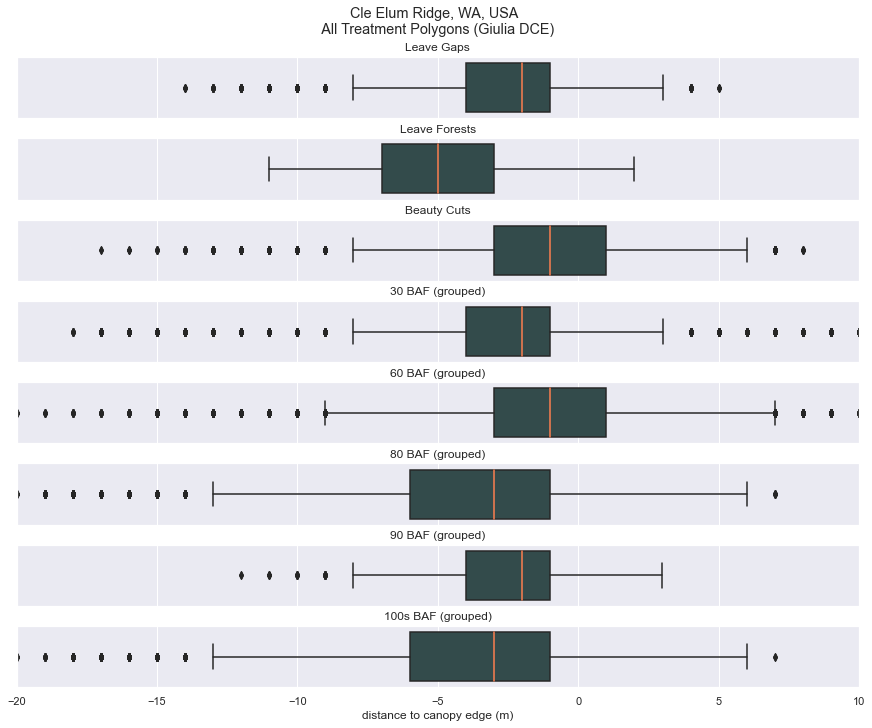

In [24]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['giulia_dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[7].set_xlabel('distance to canopy edge (m)')

# adjust x limits
axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons (Giulia DCE)')

plt.show()

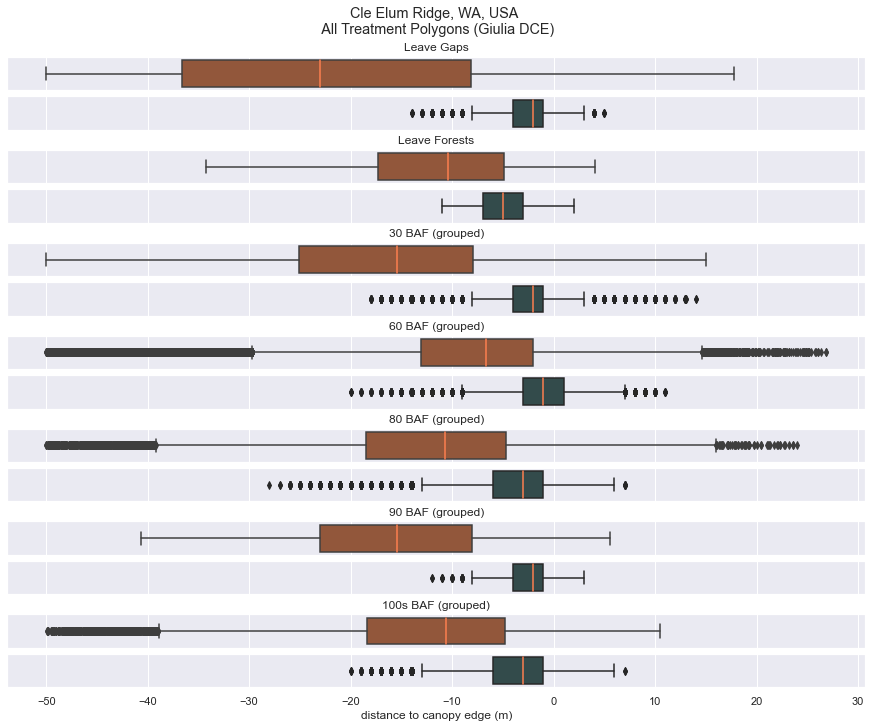

In [29]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['giulia_dce_ncalm_baf_new_1'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[2], x = ds['giulia_dce_ncalm_baf_new_2'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# sns.boxplot(ax=axes[2], x = ds['giulia_dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
# sns.boxplot(ax=axes[2], x = ds['giulia_dce_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[4], x = ds['giulia_dce_ncalm_baf_new_30s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[6], x = ds['giulia_dce_ncalm_baf_new_60s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[8], x = ds['giulia_dce_ncalm_baf_new_80s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[9], x = ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[10], x = ds['giulia_dce_ncalm_baf_new_90s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[11], x = ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[12], x = ds['giulia_dce_ncalm_baf_new_100s'].values.flatten(), color=colorpre, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
# axes[4].set_title('Beauty Cuts')
axes[4].set_title('30 BAF (grouped)')
axes[6].set_title('60 BAF (grouped)')
axes[8].set_title('80 BAF (grouped)')
axes[10].set_title('90 BAF (grouped)')
axes[12].set_title('100s BAF (grouped)')

axes[13].set_xlabel('distance to canopy edge (m)')

# adjust x limits
#axes[0].set_xlim(-20,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons (Giulia DCE)')

plt.show()

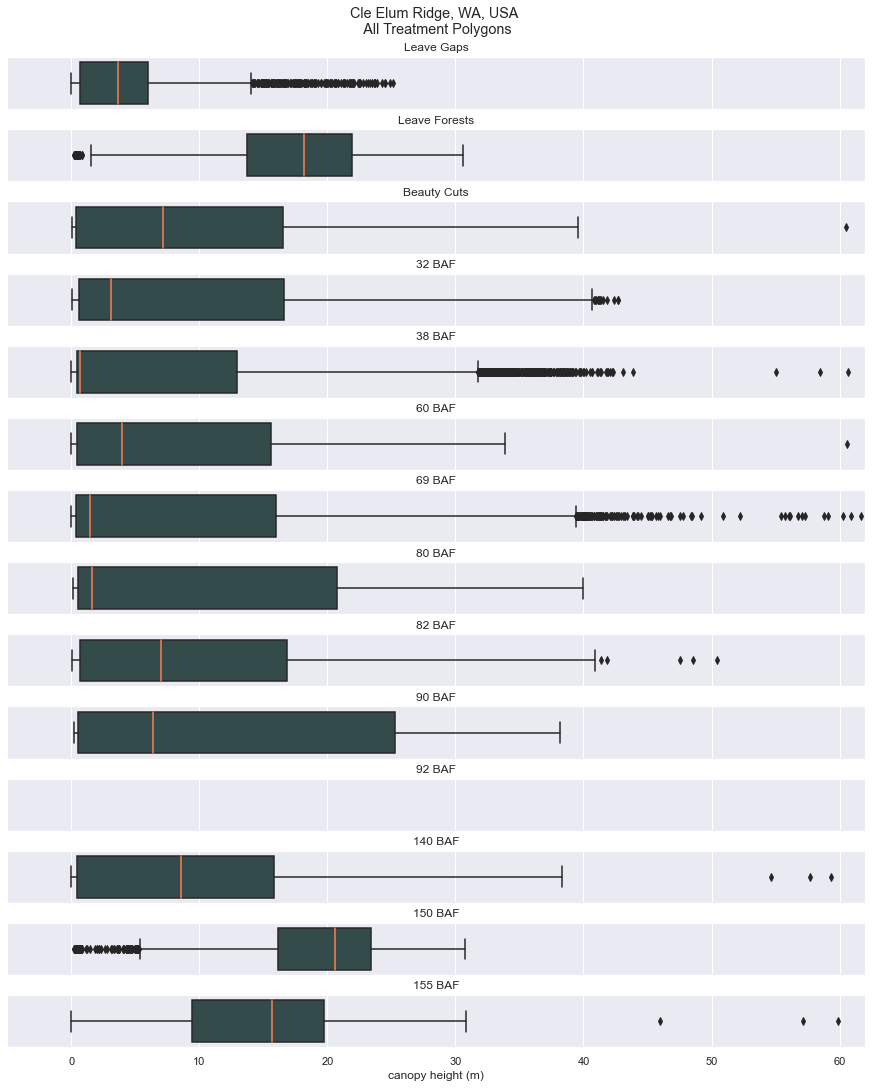

In [19]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['chmws_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['chmws_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['chmws_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[3], x = ds['chmws_rapid_baf_new_32'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['chmws_rapid_baf_new_38'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[5], x = ds['chmws_rapid_baf_new_60'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['chmws_rapid_baf_new_69'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['chmws_rapid_baf_new_80'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[8], x = ds['chmws_rapid_baf_new_82'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[9], x = ds['chmws_rapid_baf_new_90'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[10], x = ds['chmws_rapid_baf_new_92'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[11], x = ds['chmws_rapid_baf_new_140'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[12], x = ds['chmws_rapid_baf_new_150'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['chmws_rapid_baf_new_155'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
axes[10].set_title('92 BAF')
axes[11].set_title('140 BAF')
axes[12].set_title('150 BAF')
axes[13].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[13].set_xlabel('canopy height (m)')

# adjust x limits
axes[0].set_xlim(-5,62)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

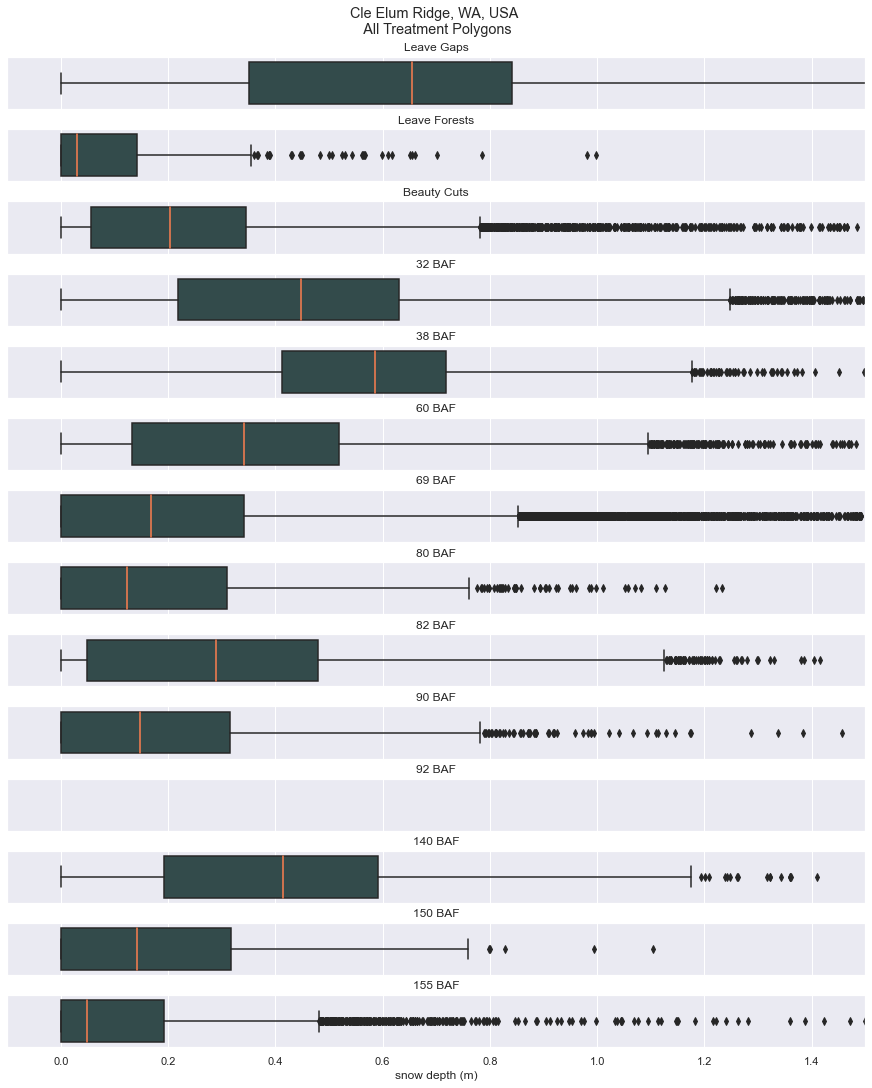

In [22]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(14, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_32'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_38'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_60'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_69'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_80'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_82'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_90'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_92'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_140'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_150'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_155'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('32 BAF')
axes[4].set_title('38 BAF')
axes[5].set_title('60 BAF')
axes[6].set_title('69 BAF')
axes[7].set_title('80 BAF')
axes[8].set_title('82 BAF')
axes[9].set_title('90 BAF')
axes[10].set_title('92 BAF')
axes[11].set_title('140 BAF')
axes[12].set_title('150 BAF')
axes[13].set_title('155 BAF')


axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[13].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

Same thing, but by north and south aspects too...

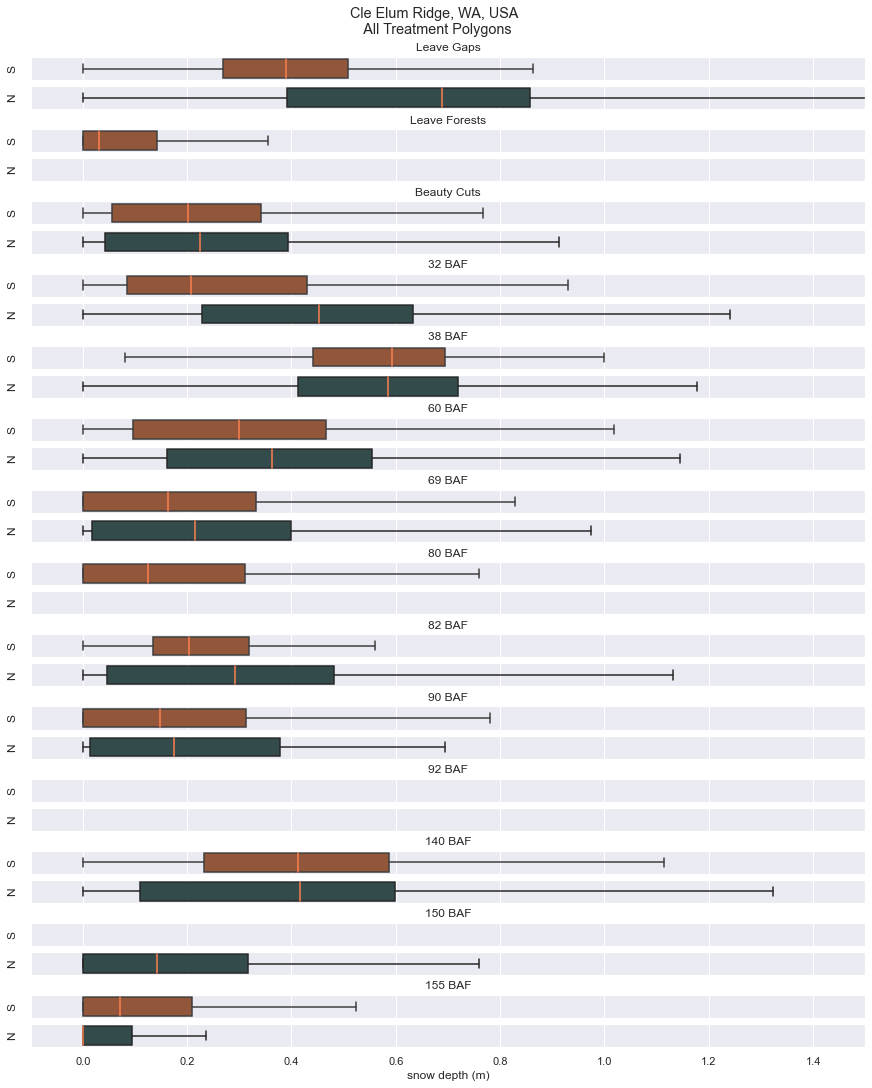

In [41]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(28, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[16], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[17], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[18], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[19], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_92_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_92_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[22], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[24], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[25], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[26], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[27], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
axes[4].set_title('Beauty Cuts')
axes[6].set_title('32 BAF')
axes[8].set_title('38 BAF')
axes[10].set_title('60 BAF')
axes[12].set_title('69 BAF')
axes[14].set_title('80 BAF')
axes[16].set_title('82 BAF')
axes[18].set_title('90 BAF')
axes[20].set_title('92 BAF')
axes[22].set_title('140 BAF')
axes[24].set_title('150 BAF')
axes[26].set_title('155 BAF')

axes[27].set_xlabel('snow depth (m)')

[axes[i].set_ylabel('S') for i in [0,2,4,6,8,10,12,14,16,18,20,22,24,26]]
[axes[i].set_ylabel('N') for i in [1,3,5,7,9,11,13,15,17,19,21,23,25,27]]

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

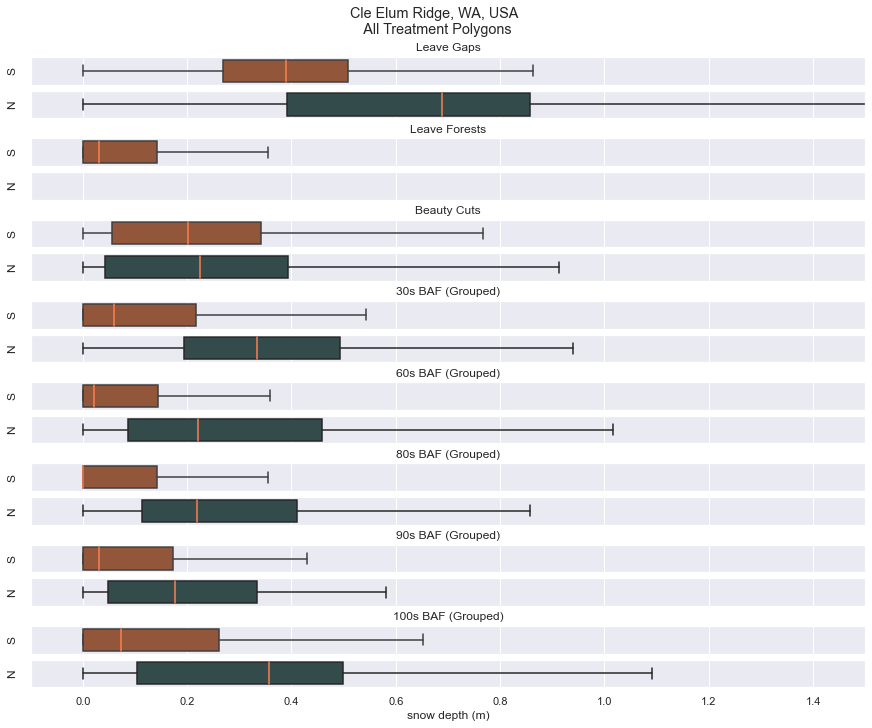

In [46]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(16, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_30s_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_30s_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_60s_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_60s_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_80s_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_80s_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_90s_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_90s_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_100s_s'].values.flatten(), color=colorpre, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_100s_n'].values.flatten(), color=colorpos, medianprops={"color":"coral"}, fliersize=0)


# labels
axes[0].set_title('Leave Gaps')
axes[2].set_title('Leave Forests')
axes[4].set_title('Beauty Cuts')
axes[6].set_title('30s BAF (Grouped)')
axes[8].set_title('60s BAF (Grouped)')
axes[10].set_title('80s BAF (Grouped)')
axes[12].set_title('90s BAF (Grouped)')
axes[14].set_title('100s BAF (Grouped)')

axes[15].set_xlabel('snow depth (m)')

[axes[i].set_ylabel('S') for i in [0,2,4,6,8,10,12,14]]
[axes[i].set_ylabel('N') for i in [1,3,5,7,9,11,13,15]]

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

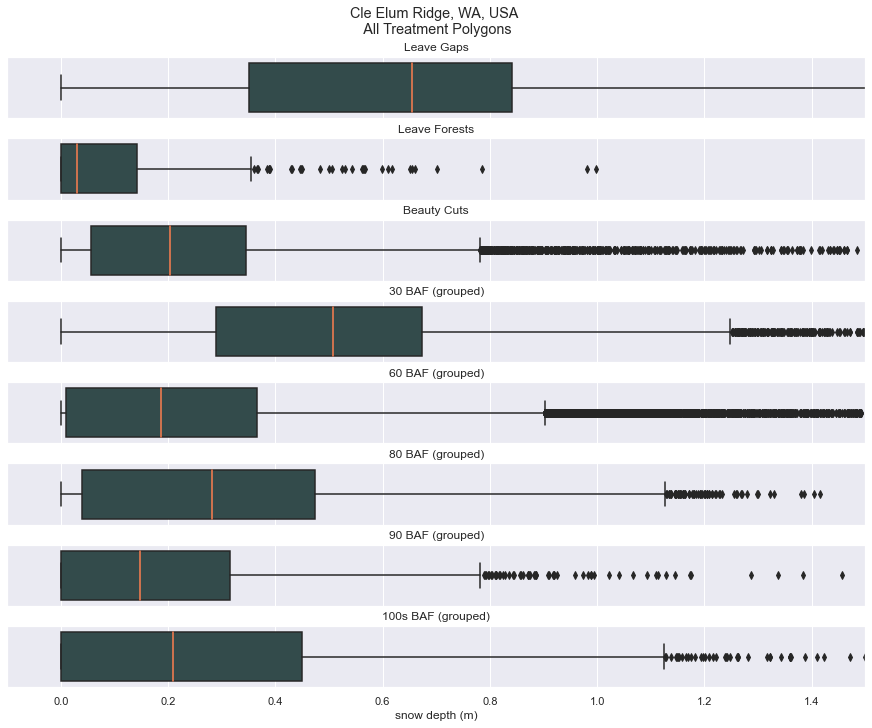

In [23]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[7].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

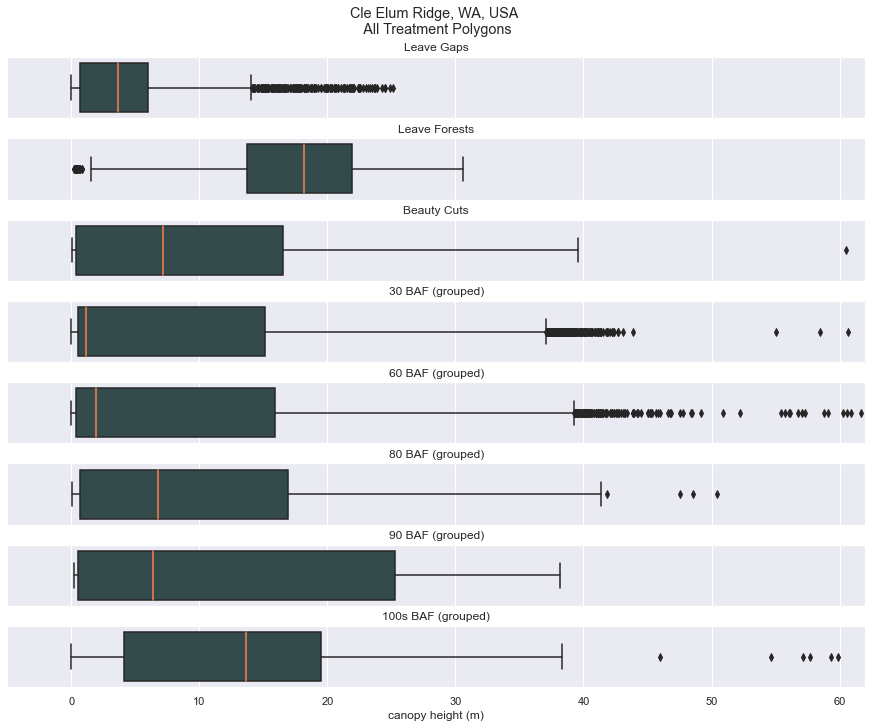

In [21]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(8, 1, sharex=True, sharey=False, figsize=(12,10), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

sns.boxplot(ax=axes[0], x = ds['chmws_rapid_baf_new_1'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[1], x = ds['chmws_rapid_baf_new_2'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[2], x = ds['chmws_rapid_baf_new_3'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[3], x = ds['chmws_rapid_baf_new_30s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[4], x = ds['chmws_rapid_baf_new_60s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[5], x = ds['chmws_rapid_baf_new_80s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[6], x = ds['chmws_rapid_baf_new_90s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})
sns.boxplot(ax=axes[7], x = ds['chmws_rapid_baf_new_100s'].values.flatten(), color=colorpos, medianprops={"color":"coral"})

# labels
axes[0].set_title('Leave Gaps')
axes[1].set_title('Leave Forests')
axes[2].set_title('Beauty Cuts')
axes[3].set_title('30 BAF (grouped)')
axes[4].set_title('60 BAF (grouped)')
axes[5].set_title('80 BAF (grouped)')
axes[6].set_title('90 BAF (grouped)')
axes[7].set_title('100s BAF (grouped)')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
axes[7].set_xlabel('canopy height (m)')

# adjust x limits
axes[0].set_xlim(-5,62)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons')

plt.show()

## Distributions

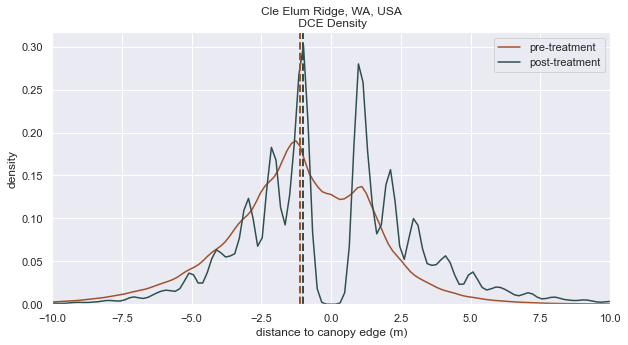

In [55]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment')
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# plot the medians
ax.axvline(ds['dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=2)
ax.axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE Density')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

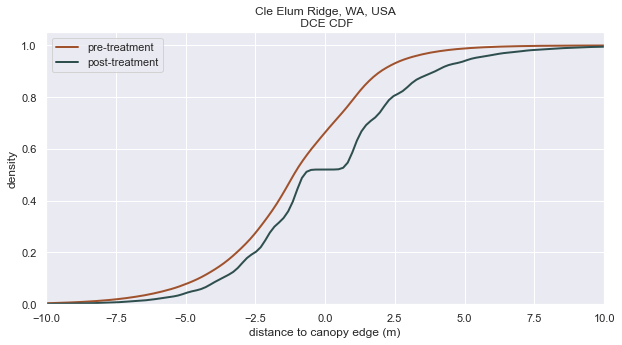

In [57]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-10,10)
plt.legend()

In [30]:
# # adjust plot size 
# fig, ax = plt.subplots(figsize=(10,5))
# sns.kdeplot(ds['giulia_dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment')
# sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment')

# # plot the medians
# ax.axvline(ds['giulia_dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
# ax.axvline(ds['giulia_dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

# plt.title('Cle Elum Ridge, WA, USA\n DCE Density Plot (Giulia)')
# plt.ylabel('density')
# plt.xlabel('distance to canopy edge (m)')
# plt.legend()

In [31]:
# # adjust plot size 
# fig, ax = plt.subplots(figsize=(10,5))
# sns.kdeplot(ds['giulia_dce_ncalm'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True)
# sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True)

# plt.title('Cle Elum Ridge, WA, USA\n DCE CDF (Giulia)')
# plt.ylabel('density')
# plt.xlabel('distance to canopy edge (m)')
# plt.legend()

Now, CDF inside each treatment 

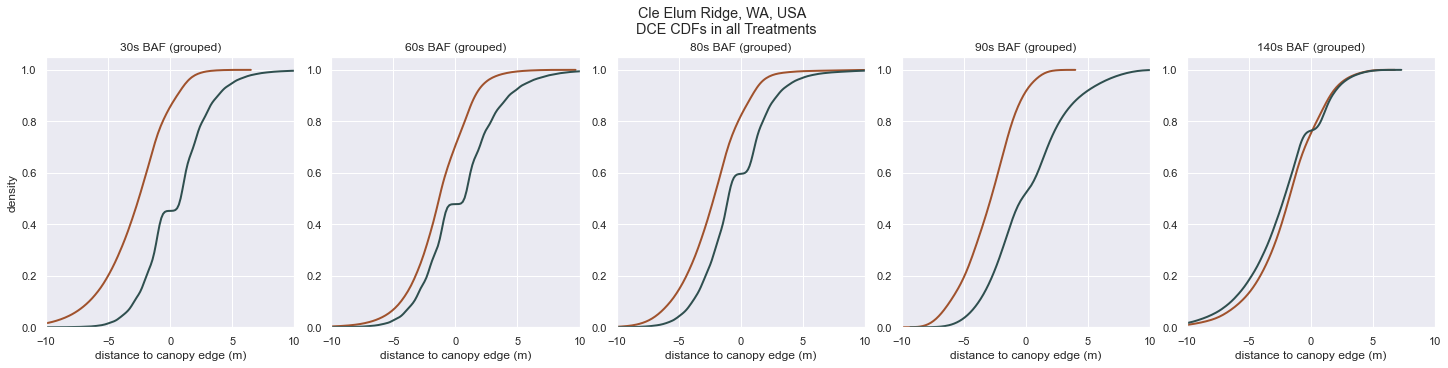

In [37]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_ncalm_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_ncalm_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_ncalm_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_ncalm_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_ncalm_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('30s BAF (grouped)')
axes[1].set_title('60s BAF (grouped)')
axes[2].set_title('80s BAF (grouped)')
axes[3].set_title('90s BAF (grouped)')
axes[4].set_title('140s BAF (grouped)')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')

plt.show()

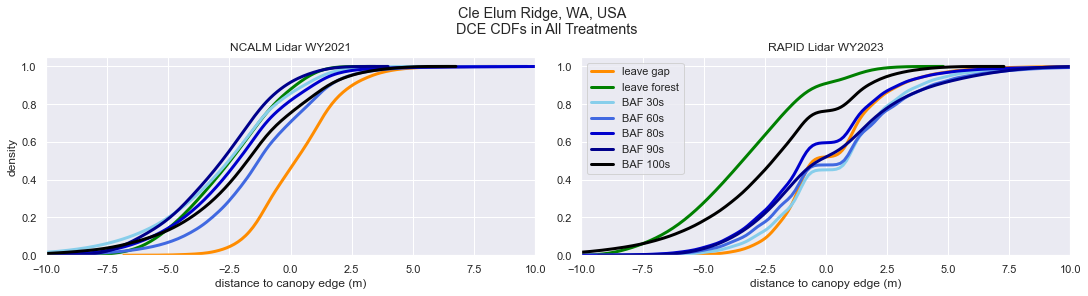

In [56]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_ncalm_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_30s'].values.flatten(), ax=axes[0], color='skyblue', label='BAF 30s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), ax=axes[1], color='skyblue', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_60s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 60s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_80s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 80s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_90s'].values.flatten(), ax=axes[0], color='darkblue', label='BAF 90s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), ax=axes[1], color='darkblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_ncalm_baf_new_100s'].values.flatten(), ax=axes[0], color='black', label='BAF 100s', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), ax=axes[1], color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
axes[0].set_title('NCALM Lidar WY2021')
axes[1].set_title('RAPID Lidar WY2023')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')


# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in All Treatments')
plt.legend()
plt.show()

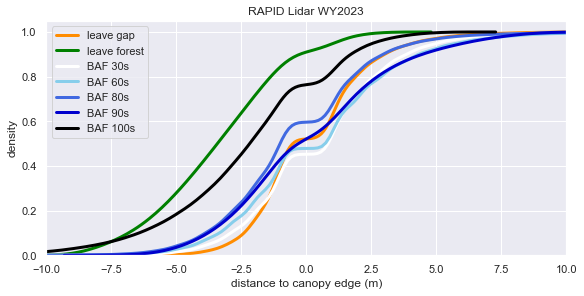

In [61]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

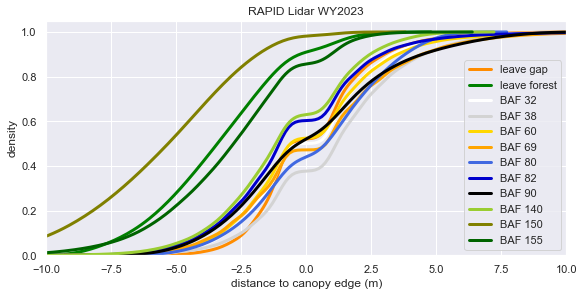

In [73]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='white', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='lightgrey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['dce_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

## Now, for snow depth

This code was put in the make NetCDF Script, so once i go back and return that, then I can delete the cell below

In [6]:
ds['hs_rapid_baf_new_1'] = ds['hs_rapid'].where(ds['baf_new'] == 1)
ds['hs_rapid_baf_new_2'] = ds['hs_rapid'].where(ds['baf_new'] == 2)
ds['hs_rapid_baf_new_3'] = ds['hs_rapid'].where(ds['baf_new'] == 3)
ds['hs_rapid_baf_new_32'] = ds['hs_rapid'].where(ds['baf_new'] == 32)
ds['hs_rapid_baf_new_38'] = ds['hs_rapid'].where(ds['baf_new'] == 38)
ds['hs_rapid_baf_new_60'] = ds['hs_rapid'].where(ds['baf_new'] == 60)
ds['hs_rapid_baf_new_69'] = ds['hs_rapid'].where(ds['baf_new'] == 69)
ds['hs_rapid_baf_new_80'] = ds['hs_rapid'].where(ds['baf_new'] == 80)
ds['hs_rapid_baf_new_82'] = ds['hs_rapid'].where(ds['baf_new'] == 82)
ds['hs_rapid_baf_new_90'] = ds['hs_rapid'].where(ds['baf_new'] == 90)
ds['hs_rapid_baf_new_92'] = ds['hs_rapid'].where(ds['baf_new'] == 92)
ds['hs_rapid_baf_new_140'] = ds['hs_rapid'].where(ds['baf_new'] == 140)
ds['hs_rapid_baf_new_150'] = ds['hs_rapid'].where(ds['baf_new'] == 150)
ds['hs_rapid_baf_new_155'] = ds['hs_rapid'].where(ds['baf_new'] == 155)

ds['hs_ncalm_baf_new_1'] = ds['hs_ncalm'].where(ds['baf_new'] == 1)
ds['hs_ncalm_baf_new_2'] = ds['hs_ncalm'].where(ds['baf_new'] == 2)
ds['hs_ncalm_baf_new_3'] = ds['hs_ncalm'].where(ds['baf_new'] == 3)
ds['hs_ncalm_baf_new_32'] = ds['hs_ncalm'].where(ds['baf_new'] == 32)
ds['hs_ncalm_baf_new_38'] = ds['hs_ncalm'].where(ds['baf_new'] == 38)
ds['hs_ncalm_baf_new_60'] = ds['hs_ncalm'].where(ds['baf_new'] == 60)
ds['hs_ncalm_baf_new_69'] = ds['hs_ncalm'].where(ds['baf_new'] == 69)
ds['hs_ncalm_baf_new_80'] = ds['hs_ncalm'].where(ds['baf_new'] == 80)
ds['hs_ncalm_baf_new_82'] = ds['hs_ncalm'].where(ds['baf_new'] == 82)
ds['hs_ncalm_baf_new_90'] = ds['hs_ncalm'].where(ds['baf_new'] == 90)
ds['hs_ncalm_baf_new_92'] = ds['hs_ncalm'].where(ds['baf_new'] == 92)
ds['hs_ncalm_baf_new_140'] = ds['hs_ncalm'].where(ds['baf_new'] == 140)
ds['hs_ncalm_baf_new_150'] = ds['hs_ncalm'].where(ds['baf_new'] == 150)
ds['hs_ncalm_baf_new_155'] = ds['hs_ncalm'].where(ds['baf_new'] == 155)

ds['hs_rapid_baf_new_30s'] = ds['hs_rapid'].where(ds['baf_new_grouped'] == 30)
ds['hs_rapid_baf_new_60s'] = ds['hs_rapid'].where(ds['baf_new_grouped'] == 60)
ds['hs_rapid_baf_new_80s'] = ds['hs_rapid'].where(ds['baf_new_grouped'] == 80)
ds['hs_rapid_baf_new_90s'] = ds['hs_rapid'].where(ds['baf_new_grouped'] == 90)
ds['hs_rapid_baf_new_100s'] = ds['hs_rapid'].where(ds['baf_new_grouped'] == 150)

ds['hs_ncalm_baf_new_30s'] = ds['hs_ncalm'].where(ds['baf_new_grouped'] == 30)
ds['hs_ncalm_baf_new_60s'] = ds['hs_ncalm'].where(ds['baf_new_grouped'] == 60)
ds['hs_ncalm_baf_new_80s'] = ds['hs_ncalm'].where(ds['baf_new_grouped'] == 80)
ds['hs_ncalm_baf_new_90s'] = ds['hs_ncalm'].where(ds['baf_new_grouped'] == 90)
ds['hs_ncalm_baf_new_100s'] = ds['hs_ncalm'].where(ds['baf_new_grouped'] == 150)

In [26]:
# now, just make new variables for each aspect 
# north
ds['hs_rapid_baf_new_1_n'] = ds['hs_rapid_baf_new_1'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_2_n'] = ds['hs_rapid_baf_new_2'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_3_n'] = ds['hs_rapid_baf_new_3'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_32_n'] = ds['hs_rapid_baf_new_32'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_38_n'] = ds['hs_rapid_baf_new_38'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_60_n'] = ds['hs_rapid_baf_new_60'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_69_n'] = ds['hs_rapid_baf_new_69'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_80_n'] = ds['hs_rapid_baf_new_80'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_82_n'] = ds['hs_rapid_baf_new_82'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_90_n'] = ds['hs_rapid_baf_new_90'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_92_n'] = ds['hs_rapid_baf_new_92'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_140_n'] = ds['hs_rapid_baf_new_140'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_150_n'] = ds['hs_rapid_baf_new_150'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_155_n'] = ds['hs_rapid_baf_new_155'].where(ds['dah_binary'] == -1)

# south 
ds['hs_rapid_baf_new_1_s'] = ds['hs_rapid_baf_new_1'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_2_s'] = ds['hs_rapid_baf_new_2'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_3_s'] = ds['hs_rapid_baf_new_3'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_32_s'] = ds['hs_rapid_baf_new_32'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_38_s'] = ds['hs_rapid_baf_new_38'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_60_s'] = ds['hs_rapid_baf_new_60'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_69_s'] = ds['hs_rapid_baf_new_69'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_80_s'] = ds['hs_rapid_baf_new_80'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_82_s'] = ds['hs_rapid_baf_new_82'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_90_s'] = ds['hs_rapid_baf_new_90'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_92_s'] = ds['hs_rapid_baf_new_92'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_140_s'] = ds['hs_rapid_baf_new_140'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_150_s'] = ds['hs_rapid_baf_new_150'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_155_s'] = ds['hs_rapid_baf_new_155'].where(ds['dah_binary'] == 1)


# grouped
ds['hs_rapid_baf_new_30s_n'] = ds['hs_ncalm_baf_new_30s'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_60s_n'] = ds['hs_ncalm_baf_new_60s'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_80s_n'] = ds['hs_ncalm_baf_new_80s'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_90s_n'] = ds['hs_ncalm_baf_new_90s'].where(ds['dah_binary'] == -1)
ds['hs_rapid_baf_new_100s_n'] = ds['hs_ncalm_baf_new_100s'].where(ds['dah_binary'] == -1)

ds['hs_rapid_baf_new_30s_s'] = ds['hs_ncalm_baf_new_30s'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_60s_s'] = ds['hs_ncalm_baf_new_60s'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_80s_s'] = ds['hs_ncalm_baf_new_80s'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_90s_s'] = ds['hs_ncalm_baf_new_90s'].where(ds['dah_binary'] == 1)
ds['hs_rapid_baf_new_100s_s'] = ds['hs_ncalm_baf_new_100s'].where(ds['dah_binary'] == 1)

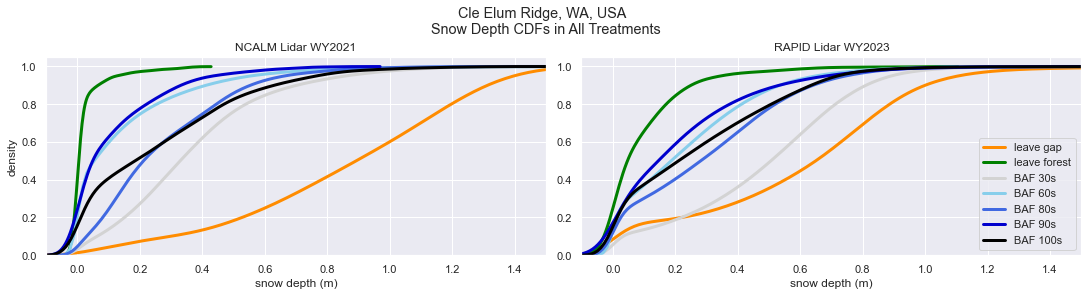

In [7]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['hs_ncalm_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_30s'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30s'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_60s'].values.flatten(), ax=axes[0], color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_80s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_80s'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_90s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_90s'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_ncalm_baf_new_100s'].values.flatten(), ax=axes[0], color='black', label='BAF 100s', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_100s'].values.flatten(), ax=axes[1], color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
axes[0].set_title('NCALM Lidar WY2021')
axes[1].set_title('RAPID Lidar WY2023')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in All Treatments')
plt.legend()
plt.show()

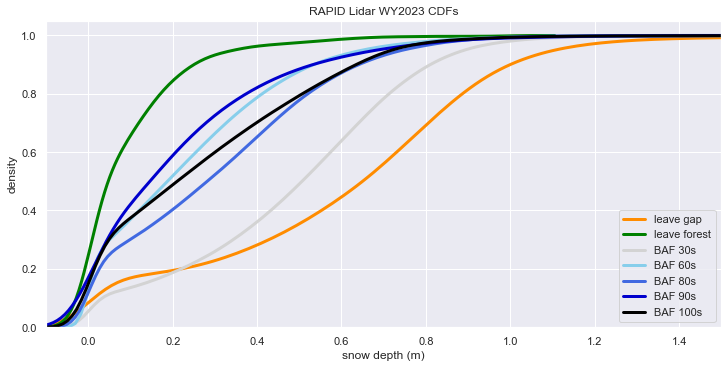

In [77]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_30s'].values.flatten(), color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

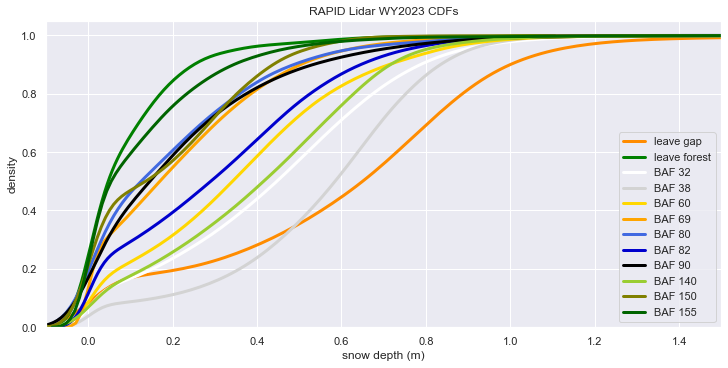

In [72]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='white', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='lightgrey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

Now, we want to do the same thing but replace BAF with DCE groups

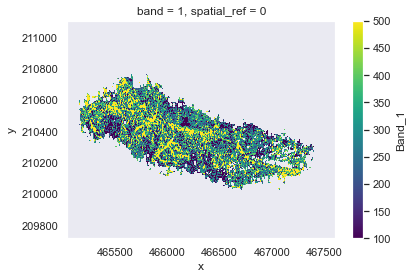

In [85]:
ds['dce_rapid_reclass'].plot()

In [8]:
ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

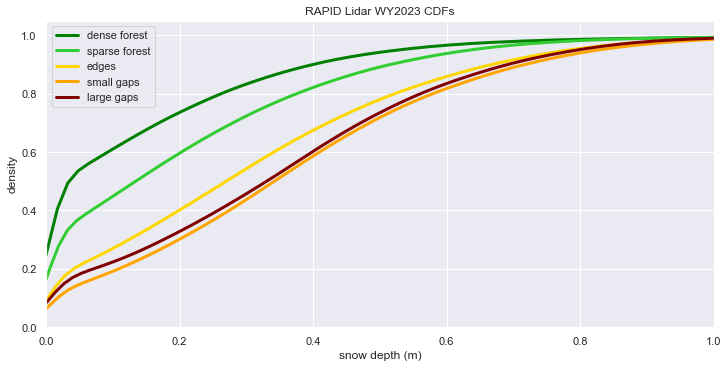

In [9]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), color='maroon', label='large gaps', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

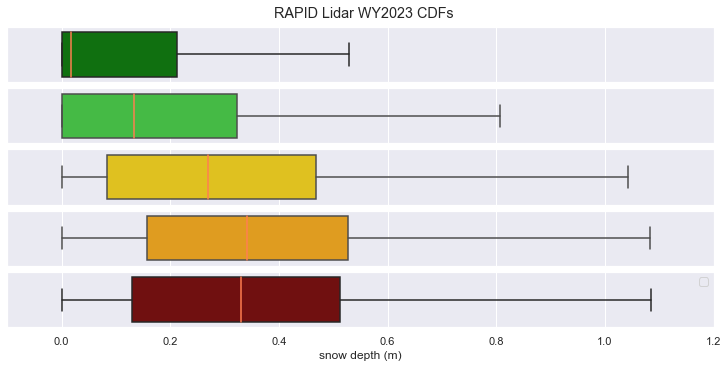

In [92]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), ax=axes[0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), ax=axes[1], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), ax=axes[2], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), ax=axes[3], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), ax=axes[4], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
# plt.ylabel('density')
plt.xlim(0,1)
plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

Now, for north and south aspects with DAH 

In [10]:
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == 1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == 1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == 1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == 1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == 1)

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

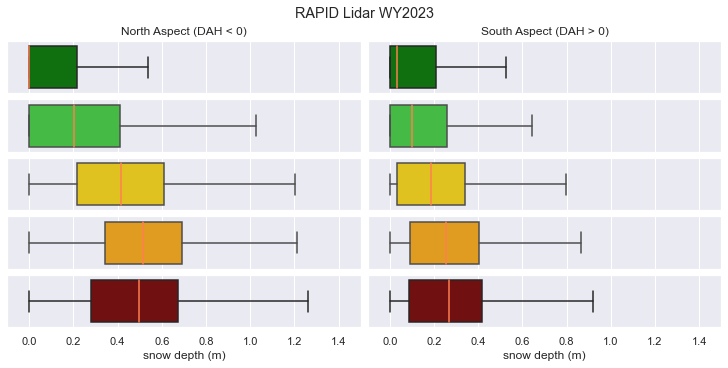

In [11]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(5, 2, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[0,0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1,0], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[2,0], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[3,0], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[4,0], color='maroon', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0,1], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[1,1], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[2,1], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[3,1], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[4,1], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023')
axes[4,0].set_xlabel('snow depth (m)')
axes[4,1].set_xlabel('snow depth (m)')

axes[0,0].set_title('North Aspect (DAH < 0)')
axes[0,1].set_title('South Aspect (DAH > 0)')

plt.xlim(-0.1,1.5)
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

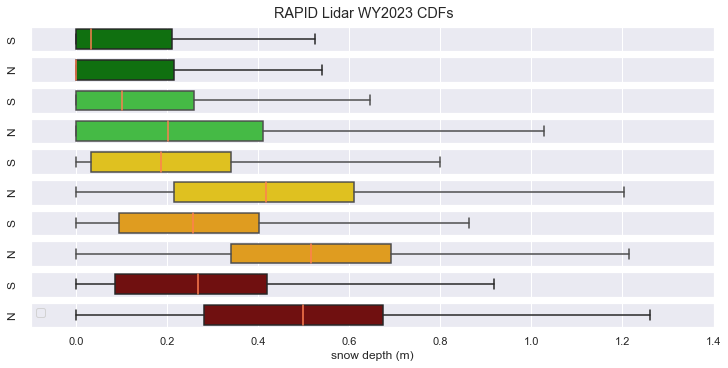

In [18]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(10, 1, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[2], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[3], color='limegreen', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[4], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[5], color='gold', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[6], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[7], color='orange', fliersize=0, medianprops={"color":"coral"})

sns.boxplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[8], color='maroon', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[9], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
# plt.ylabel('density')
plt.xlim(0,1)
plt.xlim(-0.1,1.4)

axes[0].set_ylabel('S')
axes[1].set_ylabel('N')

axes[2].set_ylabel('S')
axes[3].set_ylabel('N')

axes[4].set_ylabel('S')
axes[5].set_ylabel('N')

axes[6].set_ylabel('S')
axes[7].set_ylabel('N')

axes[8].set_ylabel('S')
axes[9].set_ylabel('N')

plt.legend()
plt.show()

## DCE Groups Histograms

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_10636\1728223625.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(labels)


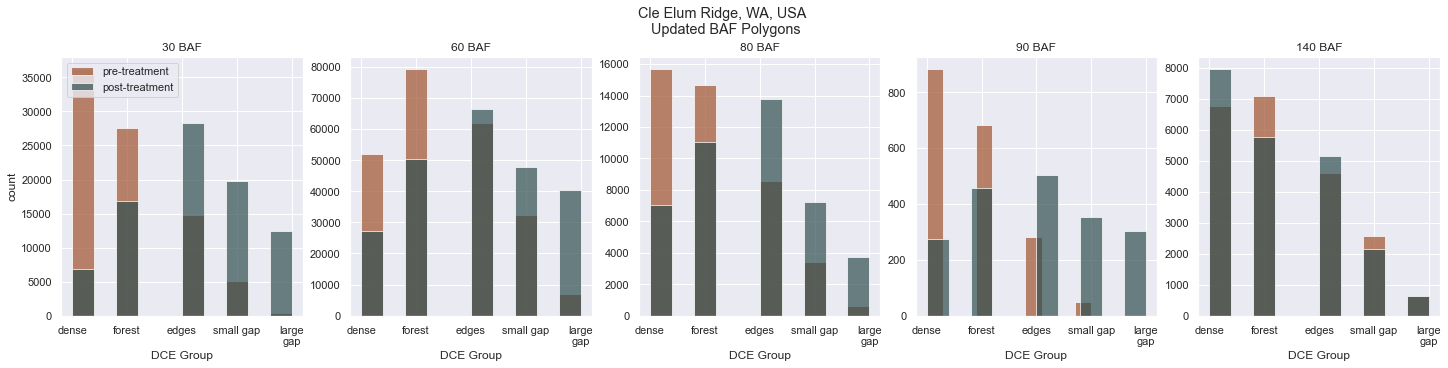

In [59]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# baf 30
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1],color=colorpos, alpha=alpha)

# baf 80
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[2],color=colorpos, alpha=alpha)

# baf 90
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[3],color=colorpos, alpha=alpha)

# baf 140
ds['dce_ncalm_reclass'].where(ds['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpre, alpha=alpha)
ds['dce_rapid_reclass'].where(ds['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[4],color=colorpos, alpha=alpha)



# labels
axes[0].set_title('30 BAF')
axes[1].set_title('60 BAF')
axes[2].set_title('80 BAF')
axes[3].set_title('90 BAF')
axes[4].set_title('140 BAF')

axes[0].set_xlabel('DCE Group')
axes[1].set_xlabel('DCE Group')
axes[2].set_xlabel('DCE Group')
axes[3].set_xlabel('DCE Group')
axes[4].set_xlabel('DCE Group')
axes[0].set_ylabel('count')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'small gap'
labels[5] = 'large\ngap'
axes[0].set_xticklabels(labels)


plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0].legend(loc='upper left')

plt.show()

Go by aspect. Do one row with positive DAH and one row with negative 

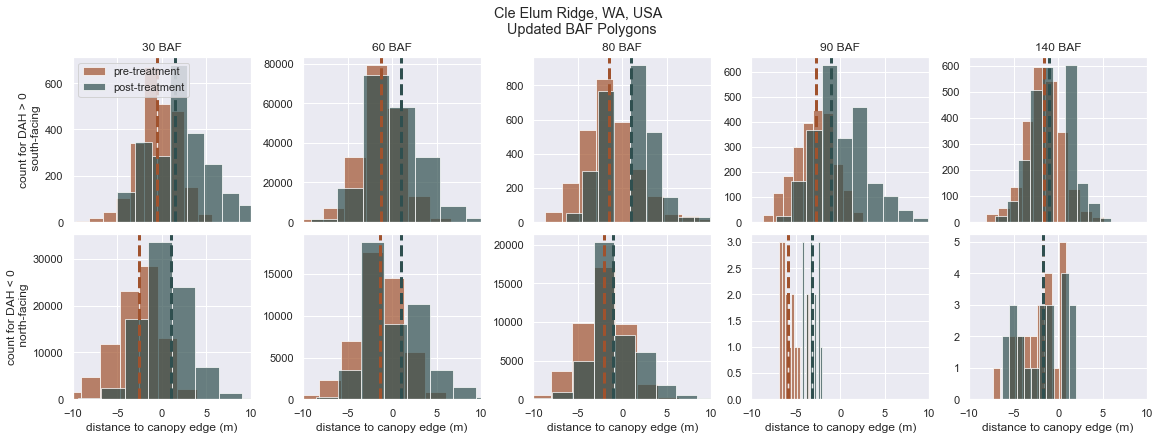

In [34]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# for DAH > 0
ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == 1).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[0,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == 1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == 1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# for DAH < 0 
ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == -1).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)

# plot the median line for each histogram 
axes[1,0].axvline(ds['dce_ncalm_baf_new_30'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,0].axvline(ds['dce_rapid_baf_new_30'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,1].axvline(ds['dce_ncalm_baf_new_60'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,1].axvline(ds['dce_rapid_baf_new_60'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,2].axvline(ds['dce_ncalm_baf_new_80'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,2].axvline(ds['dce_rapid_baf_new_80'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,3].axvline(ds['dce_ncalm_baf_new_90'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,3].axvline(ds['dce_rapid_baf_new_90'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1,4].axvline(ds['dce_ncalm_baf_new_140'].where(ds['dah_binary'] == -1).median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1,4].axvline(ds['dce_rapid_baf_new_140'].where(ds['dah_binary'] == -1).median(), color=colorpos, linestyle='dashed', linewidth=3)

# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('distance to canopy edge (m)')
axes[1,1].set_xlabel('distance to canopy edge (m)')
axes[1,2].set_xlabel('distance to canopy edge (m)')
axes[1,3].set_xlabel('distance to canopy edge (m)')
axes[1,4].set_xlabel('distance to canopy edge (m)')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x limits
axes[0,0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()

So, what we were trying to do was not working, so let's just make two versions of the dataset for DAH pos and neg, then replot
* I did not need to do that, it was an axes error, but anyway.. 

In [43]:
ds_dahpos = ds.where(ds['dah_binary'] == 1)
ds_dahneg = ds.where(ds['dah_binary'] == -1)

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_28456\3039772718.py:86: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(labels)


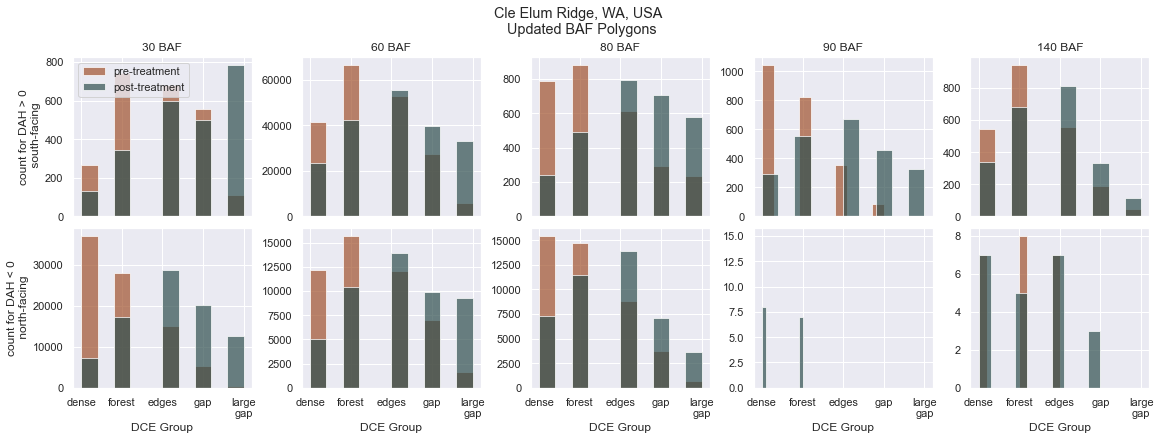

In [62]:
# plot of a histogram of all those variables 
fig, axes= plt.subplots(2, 5, sharex=True, sharey=False, figsize=(16,6), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots  for DAH > 0, pos
# baf 30
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[0,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[0,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[0,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[0,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahpos['dce_ncalm_reclass'].where(ds_dahpos['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpre, alpha=alpha)
ds_dahpos['dce_rapid_reclass'].where(ds_dahpos['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[0,4],color=colorpos, alpha=alpha)


# plots for DAH < 0, neg
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpre, label='pre-treatment', alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_30'].notnull()).plot.hist(ax=axes[1,0],color=colorpos, label='post-treatment', alpha=alpha)

# baf 60
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_60'].notnull()).plot.hist(ax=axes[1,1],color=colorpos, alpha=alpha)

# baf 80
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_80'].notnull()).plot.hist(ax=axes[1,2],color=colorpos, alpha=alpha)

# baf 90
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_90'].notnull()).plot.hist(ax=axes[1,3],color=colorpos, alpha=alpha)

# baf 140
ds_dahneg['dce_ncalm_reclass'].where(ds_dahneg['dce_ncalm_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpre, alpha=alpha)
ds_dahneg['dce_rapid_reclass'].where(ds_dahneg['dce_rapid_baf_new_140'].notnull()).plot.hist(ax=axes[1,4],color=colorpos, alpha=alpha)


# labels
axes[0,0].set_title('30 BAF')
axes[0,1].set_title('60 BAF')
axes[0,2].set_title('80 BAF')
axes[0,3].set_title('90 BAF')
axes[0,4].set_title('140 BAF')

axes[1,0].set_title(''); axes[1,1].set_title(''); axes[1,2].set_title(''); axes[1,3].set_title(''); axes[1,4].set_title('')
axes[0,0].set_xlabel(''); axes[0,1].set_xlabel(''); axes[0,2].set_xlabel(''); axes[0,3].set_xlabel(''); axes[0,4].set_xlabel('')

axes[1,0].set_xlabel('DCE Group')
axes[1,1].set_xlabel('DCE Group')
axes[1,2].set_xlabel('DCE Group')
axes[1,3].set_xlabel('DCE Group')
axes[1,4].set_xlabel('DCE Group')
axes[0,0].set_ylabel('count for DAH > 0\n south-facing')
axes[0,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[0,3].set_ylabel('')
axes[0,4].set_ylabel('')

axes[1,0].set_ylabel('count for DAH < 0\n north-facing')
axes[1,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[1,4].set_ylabel('')

# adjust x labels 
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'dense'
labels[2] = 'forest'
labels[3] = 'edges'
labels[4] = 'gap'
labels[5] = 'large\ngap'
axes[0,0].set_xticklabels(labels)

plt.suptitle('Cle Elum Ridge, WA, USA \n Updated BAF Polygons')
axes[0,0].legend(loc='upper left')

plt.show()